# Distributions

The general need for distributions is made clear once users realize that saying something is "random" is entirely insufficient to describe its behavior.

For example, if I say "give me a random number" and a student says $\pi \dots$ Is that acceptable? There's no way that exact number could every really come up at random, it just was being chosen *impulsively* and *without reflection*. But that's not really what I wanted by random!

As it turns out, there are huge biases in human selection of "random numbers". When asked to name a random number between 1-10, [most people pick 7](https://www.youtube.com/watch?v=SxP30euw3-0).

Distributions help clarify what researchers mean by random - both for number generation and descriptions of processes.

[Remember - you should be saving, breaking, and then fixing every bit of code I give you. If you don't break it, you're not learning. ](https://i.guim.co.uk/img/static/sys-images/Education/Pix/pictures/2012/1/5/1325788430974/Pupils-at-Townley-Grammar-007.jpg?width=445&quality=45&auto=format&fit=max&dpr=2&s=d06e89e4d54c148874f0e95204622503)

#### Manually Creating Data

Let's create a random number 

In [ ]:
import pandas as pd
import numpy as np
from numpy import random
import seaborn as sns
from scipy.stats import rv_discrete

In [ ]:
uniformData = random.rand(10000)

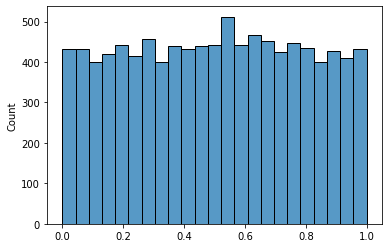

In [ ]:
uniformHist = sns.histplot(uniformData)

This basic histogram appears to be bound between 0 and 1, this looks roughly like a **uniform distribution**.

We can also consider data stored as categorical, the most common type of categorical data is binary (T/F or 1/0 depending on coder's choice).



In [ ]:
#Let's make it categorical, a heads/tails type conversion.
uniformAsBinary = pd.DataFrame(uniformData>0.5)
uniformAsBinary.describe()

,0
count,10000
unique,2
top,True
freq,5058


In [ ]:
# If we hand it a pair of value and probability vectors it can caluclate our probabilities for custom distributions.
x = np.arange(0, 100)
p = x/sum(x) #some nonsense probability selected. Feel free to explore it but it was arbitrary.
customDist = rv_discrete(values = (x, p))

In [ ]:
print("mean:", customDist.mean(), " var:", customDist.var(), " sd:", customDist.std())

mean: 66.33333333333334  var: 549.8888888888887  sd: 23.449709782615408


Do you remember how to calculate these values? Review formulas.

#### Bernoulli Distribution

In [ ]:
x = [0,1]
p = [0.5,0.5]
binomialDist = rv_discrete(values = (x, p))
print("mean:", binomialDist.mean(), " var:", binomialDist.var(), " sd:", binomialDist.std())

mean: 0.5  var: 0.25  sd: 0.5


This distribution has specific properties. When the probability of success $(p)$ is allowed to be something other than $\frac{1}{2}$:

Mean: $p$

Variance: $(1-p)*p$

Std. Dev: $\sqrt{(1-p)*p}$


In [ ]:
#let's explore this:
p = 0.001
x = [0,1]
p_vec = [1-p,p]
binomialDist = rv_discrete(values = (x, p_vec))
print("mean:", binomialDist.mean(), " var:", binomialDist.var(), " sd:", binomialDist.std())

mean: 0.001  var: 0.000999  sd: 0.03160696125855822


For your notes, I expect you explore this distribution. 



*   What happens to the mean, variance and SD if p increases?
*   Why?



#### Binomial Distribution

Binomial distribution is the sum of several Bernoullis - let's try simulating some of these properties.  

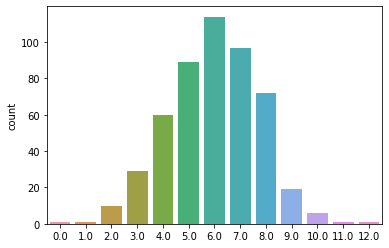

In [ ]:
# This can (and should) be done as a single vector much more effectively. 
# However, the loop structure is very intuitive, although more processing intensive.
# Vectorize this and the first one to do so independently will get EC.
n = 12
p = 0.5
testRuns = 500
storedResults = np.zeros(testRuns)
for i in range(0, testRuns):
  count = 0
  for j in range(0,n):
    if random.rand() > 0.5:
      count = count + 1
  storedResults[i] = count

binaryHist=sns.countplot(x = storedResults)

In [ ]:
print("mean:", storedResults.mean(), " var:", storedResults.var(), " sd:", storedResults.std())

mean: 5.972  var: 3.0472159999999997  sd: 1.7456276808071072


We know that these results tend to be inaccurate - they're just simulations after all. And we don't have enough hours in the day to simulate these accurately enough to scoop a standard answer-checking software... so we actually have to know the *true answer*.

The mean of multiple trials is: $p + p + p \dots = np $

Each trial has the same chance of success, the *means sum*.

One might think we are asking you to learn this rule because we want you to know the mean of the binomial distribution. It's not. It's because we want you to know that *means sum*. If you memorize this rule, you will always be able to find this property.

Example: Consider the sum of 3 independent binary trials with 50% success rate.

Example: Consider the sum of 4 independent coin flips, where heads are worth 1 and tails are worth 0.

Example: Consider the sum of 3d6. What is the average of this sum?

Hint: *all three depend on the same rule.*

The variance of multiple trials also sums!
So if the variance of the first trial is equal to $\sigma^2_1$, then the variance of two trials is equal to $\sigma^2_1+\sigma^2_1 = 2 \sigma^2_1$

Then the variance of $n$ trials is $n\sigma^2_1$.

Finally, we remind that the variance of a single trial can be written in only terms of probability of success, so it is $n(1-p)p$.

Again, we don't teach you this so you know the variance of binomial trials, this is a factoid and can be looked up. We want to know if you understand that *variances add*.  

If you are in Econometrics, this is in Pearson key concept 2.3.

Example: Consider the variance of the sum of 3 independent binary trials with 50% success rate.

Example: Consider the variance of the sum of 4 independent coin flips, where heads are worth 1 and tails are worth 0.

Example: Consider the sum of 3d6. What is the variance of this sum?

Hint: *Again, all three depend on the same rule*.

# Poisson Distribution

Note: pronounced: "Poy-San" or "Puh-San"

Gives probability of exactly $k$ events happening over a period or area where $\lambda$ events happen on average.

$P(k) = e^{-\lambda}\frac{\lambda^k}{k!}$

Most of this is simply plug and chug.

Example: What is the probability of seeing 3 cats at night in a neighborhood where one typically sees 6 cats each night?

Example: What is the probability of seeing 3 or fewer cats at night in a neighborhood where one typically sees 6? Reminder: 0! is 1.

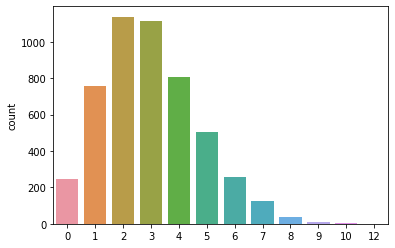

In [ ]:
poissonData = random.poisson(3, 5000) #lambda = 3, make 5000 draws from this distribution.
poissonHist = sns.countplot(x = poissonData) 

# Normal Distribution

Another common workhorse distribution, undoubtably the most common distribution used in modeling or theory, not neccessarily the most common in natural data (natural data come in an indiscribable number of values).

This is by **far and away** the most important distribution you will learn about. I need you to know *what it looks like*, *what its proportions are*, and *what its parameters are*.


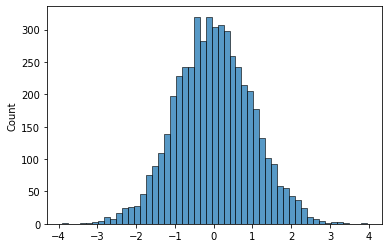

In [ ]:
normalHist = sns.histplot(random.normal(0, 1, 5000)) #mean = 0, sd = 1, number of draws.

Now, the mean and sd are the parameters of this distribution, meaning these are the only things you need to define one!  All of these distributions are going to be normal.

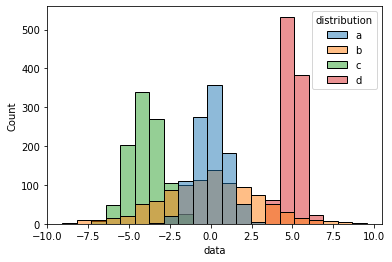

In [ ]:
normalData = pd.DataFrame(index=range(0,4000), columns=['data','distribution'])
normalData = normalData.fillna(0)

normalData.loc[0:999,'data']     = random.normal(0, 1, 1000)  #think about what the .loc argument does.
normalData.loc[1000:1999,'data'] = random.normal(0, 3, 1000) #mean = 0, sd = 3, number of draws.
normalData.loc[2000:2999,'data'] = random.normal(-4, 1, 1000)
normalData.loc[3000:3999,'data'] = random.normal(5, 0.5, 1000)

normalData.loc[0:999,'distribution']     = 'a'
normalData.loc[1000:1999,'distribution'] = 'b'
normalData.loc[2000:2999,'distribution'] = 'c'
normalData.loc[3000:3999,'distribution'] = 'd'

normalHist = sns.histplot(x = normalData['data'], hue = normalData['distribution']) 

Let's normalize these. Normalizing is: $\frac{x_i-\mu_x}{\sigma_x}$

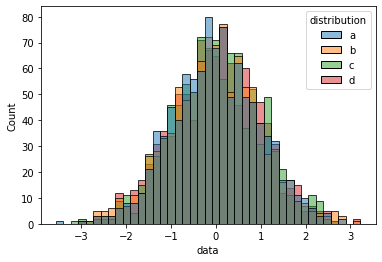

In [ ]:
#Basically, after normalizing, I just (basically) have 4k observations from the same distribution, the standard normal one. 
normalData.loc[0:999,'data']     = ((normalData.loc[0:999,'data'] - 0) / 1)  #sometimes you don't know these parameters and have to use sample averages.
normalData.loc[1000:1999,'data'] = ((normalData.loc[1000:1999,'data'] - 0) / 3) 
normalData.loc[2000:2999,'data'] =  ((normalData.loc[2000:2999,'data'] - -4) / 1) #Why am I picking each of these numbers? --4?  1? 
normalData.loc[3000:3999,'data'] =((normalData.loc[3000:3999,'data'] - 5) / 0.5) 

standardizedHist = sns.histplot(x = normalData['data'], hue = normalData['distribution']) 

All normal distributions, before OR after normalizing, obey the 68/95/99.7 rule.  But **after** normalizing, they are all part of the "standard normal distribution". 

normalizing(Normal distribution) = "standard normal distribution"

The terms are not the best, but at least it's literal.

A crazy miracle is that after normalizing, *nearly anything* ends up being basically normal. This is called the **central limit theorem**. There are a few exceptions, but not the kind you will run into often.

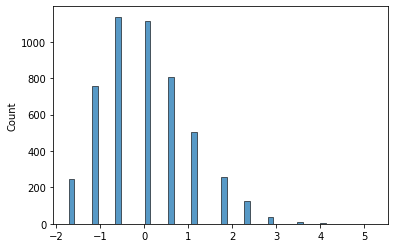

In [ ]:
#This one does pretty good.
normalizedPoisson = (poissonData - poissonData.mean()) / poissonData.std()
histNormedPoisson = sns.histplot(x = normalizedPoisson)

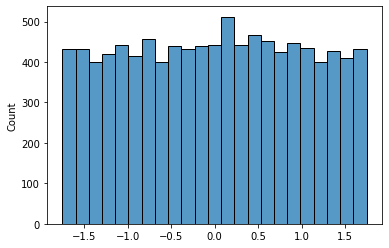

In [ ]:
#This one has trouble getting the right shape - mostly because of the nonexistance of the tails.
normalizedUnif = (uniformData - uniformData.mean()) / uniformData.std()
histNormedUnif = sns.histplot(x = normalizedUnif)
#like I said, nearly anything. Cough cough.  If you normalize this a few times it will look normal.

# Activity

*   Discuss and break at least 2 functions, at least one of which contains a for-loop. Then fix them. Explain what broke and how you fixed it.  
*   Create a function definition that normalizes a data set. Use **def**, don't use a canned normalization function. Hint: It's almost entirely written above.
*   Answer both the Poisson practice questions using code and a simulation, your answer must spit out a probability each time.
*   Using typed work (no code), find for me the probability that a value X from a standard normal distribution falls between -1 and +1.  Then find the probability that it falls between -1 and +2.  Hint: Need rules of thumb.


For 120 points, do all 4.
For 100 points, do 3.
For 80 points, do 2.
For 60 points, do 1.

Copy-paste them to the end here so I don't have to look for them, but *you should have already broken something along the way*.
